<a href="https://colab.research.google.com/github/ailijevski/BlueReefModel/blob/main/AIModelPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Coral Reef Growth to Determine Coral Reef Health Indexes ©

By: Angelina Ilijevski, Chris Zhang, Natalia Alejo, Andres Ramirez


In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from google.colab import drive
import pandas as pd
import datetime as dt
import numpy as np
import sklearn
from sklearn import feature_selection
from joblib import load, dump
import statistics
%matplotlib inline

## Introduction

A considerable issue today is the impact of human interaction on underwater ecosytems. With multiple variables known to impact sea life, our team set out to research the variables that are known to affect a specific niche of these life forms -- coral reefs. Our goal with this ongoing research is to pinpoint the most negatively impacted coral reef ecosystems and be able to direct non-profits/ NGOs to these regions. By supplying interested non-profits/ NGOs with relevant coral reef health metrics, we will be able to better identify coral reefs at risk of thinning, bleaching, or other harmful affects and revive them accordingly.

After thorough research, it became clear to the team that coral growth, temperature, and water properties were important to defining the health of coral reef ecosystems. Further research uncovered that the presence of sunscreen may modify pH levels of the water, high temperatures and presence of invasive species may promote coral bleaching and disrupt ecosystems, and many other facts presented in our accompanying research outlines. These variables affect the physical attributes of coral reefs by making them thinner and more susceptible to breakage. As a result, coral reefs are unable to produce sufficient amounts of aragonite to strengthen their skeletons.  

With this information and research, our team formulated an equation to determine a **coral reef index** from coral growth (proportionally related to pH), water temperature, and aragonite measurements. Though we recognize that other factors may also be significant to include in this equation, we must perform further research to determine the impact of the other potential determinants by proportion. 





## Purpose

As a proof of concept, our team chose to build machine learning models to predict the values for the variables involved in our coral reef index equation. The reason this is so important is because it will allow us to predict quantities that our sensor may not be able to detect yet are crucial to defining a coral reef's health status. This model is meant to be replicated and trained on factors that influence the variables (coral growth, temperature, aragonite level) that are included in our index calculations. This way, if further research shows that other variables are significant enough to include in our evaluation of coral reefs, we can predict their values with enough evidence gathered with our sensor regarding the surrounding ecosystem of the coral reef.

A collection of coral reef indexes are calculated below after the appropriate machine learning model training takes effect. Since the coral reefs studied in the dataset we chose to use (available [here](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:0168915)) were all in the same region, they have similar coral reef indexes, as expected. After grounding our sensors in multiple different coral reef ecosystems around the world, we will be able to predict a wider range of coral reef indexes scoring anywhere between 0.1 and 5, with higher scores indicating better health.

$CRI = \frac{1}{\sqrt{a^2*\frac{G}{T}} - 0.5} * (n - 0.1)$




## Determining Coral Reef Growth

In the analysis below, we will illustrate the feasibility of predicting one of the variables used in our coral reef index calculation -- namely, coral growth -- which is proportionally related to pH of the surrounding water.

### Import the data into Pandas Dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- What are the number of instances/samples in the DataFrame?
- How many missing instances are there in the DataFrame? Which features are missing instances?

In [ ]:
# reading in dataset
drive.mount('/content/drive')
d = pd.read_csv('/content/drive/My Drive/Colab Notebooks/coralreef.csv')
df = pd.DataFrame(data=d)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# finding number of data points & samples
print("The number of datapoints is", df.size)
print("The number of samples is", df.shape[0])

The number of datapoints is 2193
The number of samples is 51


In [ ]:
df.head()

,EXPOCODE,CRUISE_ID,STATION_ID,CAST_NUMBER,SAMPLE_ID,YEAR_UTC,MONTH_UTC,DAY_UTC,TIME_UTC,YEARDAY_UTC,...,SURVEY_DESIGN,SAMPLE_FREQUENCY,TEMPERATURE_ITS90_BEST,TEMPERATURE_ITS90_BEST_ORIGIN,SALINITY_PSS78_BEST,SALINITY_PSS78_BEST_ORIGIN,PH_TS_CALCULATED,PCO2_UATM_CALCULATED,ARAGONITE_SAT,TIMESTAMP_UTC
0,NaN,CTI 2013 TIM,VIL-03,1,3804,2013,6,6,00:31:00,157.02,...,Permanent,Single,28.71280,CTD,32.946,Bottle,8.043854,382.629756,3.542726,2013-06-06 00:31:00
1,NaN,CTI 2013 TIM,VIL-03,1,3805,2013,6,6,00:31:00,157.02,...,Permanent,Single,28.71280,CTD,33.051,Bottle,8.029130,396.994249,3.444215,2013-06-06 00:31:00
2,NaN,CTI 2013 TIM,TIM-110,1,3806,2013,6,6,00:54:00,157.04,...,Random,Single,28.51006,CTD,32.879,Bottle,8.056669,368.421274,3.586775,2013-06-06 00:54:00
3,NaN,CTI 2013 TIM,VIL-10,1,3807,2013,6,6,22:36:00,157.94,...,Permanent,Single,28.67146,CTD,32.953,Bottle,8.031010,396.895760,3.459103,2013-06-06 22:36:00
4,NaN,CTI 2013 TIM,VIL-10,1,3808,2013,6,6,22:36:00,157.94,...,Permanent,Single,28.67146,CTD,32.959,Bottle,8.018683,409.801148,3.376303,2013-06-06 22:36:00


In [ ]:
# finding sum of missing instances for each column (feature) in dataframe
print('Below is a summary of which features contain missing instances: \n')
df.isna().sum()

Below is a summary of which features contain missing instances: 



EXPOCODE                         51
CRUISE_ID                         0
STATION_ID                        0
CAST_NUMBER                       0
SAMPLE_ID                         0
YEAR_UTC                          0
MONTH_UTC                         0
DAY_UTC                           0
TIME_UTC                          0
YEARDAY_UTC                       0
LATITUDE_DEC                      0
LONGITUDE_DEC                     0
PRESSURE_DB_CTD                  41
PRESSURE_DB_CALCULATED           10
DEPTH_METER                       0
TEMPERATURE_ITS90_CTD             9
TEMPERATURE_ITS90_CTD_FLAG        9
TEMPERATURE_ITS90_SCS            51
SALINITY_PSS78_CTD               51
SALINITY_PSS78_CTD_FLAG          51
SALINITY_PSS78_BOTTLE             0
SALINITY_PSS78_BOTTLE_FLAG        0
SALINITY_PSS78_SCS               51
DIC_UMOL_KG                       0
DIC_UMOL_KG_FLAG                  0
TALK_UMOL_KG                      0
TALK_UMOL_KG_FLAG                 0
CTDCASTID_ESD               

In [ ]:
df.head()

,EXPOCODE,CRUISE_ID,STATION_ID,CAST_NUMBER,SAMPLE_ID,YEAR_UTC,MONTH_UTC,DAY_UTC,TIME_UTC,YEARDAY_UTC,...,SURVEY_DESIGN,SAMPLE_FREQUENCY,TEMPERATURE_ITS90_BEST,TEMPERATURE_ITS90_BEST_ORIGIN,SALINITY_PSS78_BEST,SALINITY_PSS78_BEST_ORIGIN,PH_TS_CALCULATED,PCO2_UATM_CALCULATED,ARAGONITE_SAT,TIMESTAMP_UTC
0,NaN,CTI 2013 TIM,VIL-03,1,3804,2013,6,6,00:31:00,157.02,...,Permanent,Single,28.71280,CTD,32.946,Bottle,8.043854,382.629756,3.542726,2013-06-06 00:31:00
1,NaN,CTI 2013 TIM,VIL-03,1,3805,2013,6,6,00:31:00,157.02,...,Permanent,Single,28.71280,CTD,33.051,Bottle,8.029130,396.994249,3.444215,2013-06-06 00:31:00
2,NaN,CTI 2013 TIM,TIM-110,1,3806,2013,6,6,00:54:00,157.04,...,Random,Single,28.51006,CTD,32.879,Bottle,8.056669,368.421274,3.586775,2013-06-06 00:54:00
3,NaN,CTI 2013 TIM,VIL-10,1,3807,2013,6,6,22:36:00,157.94,...,Permanent,Single,28.67146,CTD,32.953,Bottle,8.031010,396.895760,3.459103,2013-06-06 22:36:00
4,NaN,CTI 2013 TIM,VIL-10,1,3808,2013,6,6,22:36:00,157.94,...,Permanent,Single,28.67146,CTD,32.959,Bottle,8.018683,409.801148,3.376303,2013-06-06 22:36:00


In [ ]:
# dropped missing instances
df = df.dropna(axis=0)
df.isna().sum()

### Feature Engineering
We will not change any features, because we want to use them in their original form. 


### Examining Correlations
Investigate linear correlations between features and visualize the data.

In [ ]:
# choosing features to examine
xAll = df[['DAY_UTC', 'LATITUDE_DEC', 'LONGITUDE_DEC', 'PRESSURE_DB_CALCULATED', 'DEPTH_METER', 'TEMPERATURE_ITS90_CTD', 'SALINITY_PSS78_BOTTLE', 'DIC_UMOL_KG', 'PCO2_UATM_CALCULATED']].to_numpy()
labels = ['Day', 'Latitude', 'Longitude', 'Pressure', 'Depth', 'Temperature', 'Salinity', 'Dissolved_Inorganic_Carbon', 'pCO2']
y = df['PH_TS_CALCULATED'].to_numpy() # using to determine coral growth

In [ ]:
range = max(y)-min(y)
median = statistics.median(y)
stddev = statistics.stdev(y)
mean = statistics.mean(y)

print('Statistics on the pH values:')
print('Range:', range)
print('Median:', median)
print('Stdev:', stddev)
print('Mean:', mean)
print('Min:', min(y))
print('Max:', max(y))

Statistics on the pH values:
Range: 0.044039058865690706
Median: 8.043542325313915
Stdev: 0.011108546156756492
Mean: 8.04204563371384
Min: 8.0172048263972
Max: 8.06124388526289


### Creating Pairplots to demonstrate linear and non-linear correlations between features:

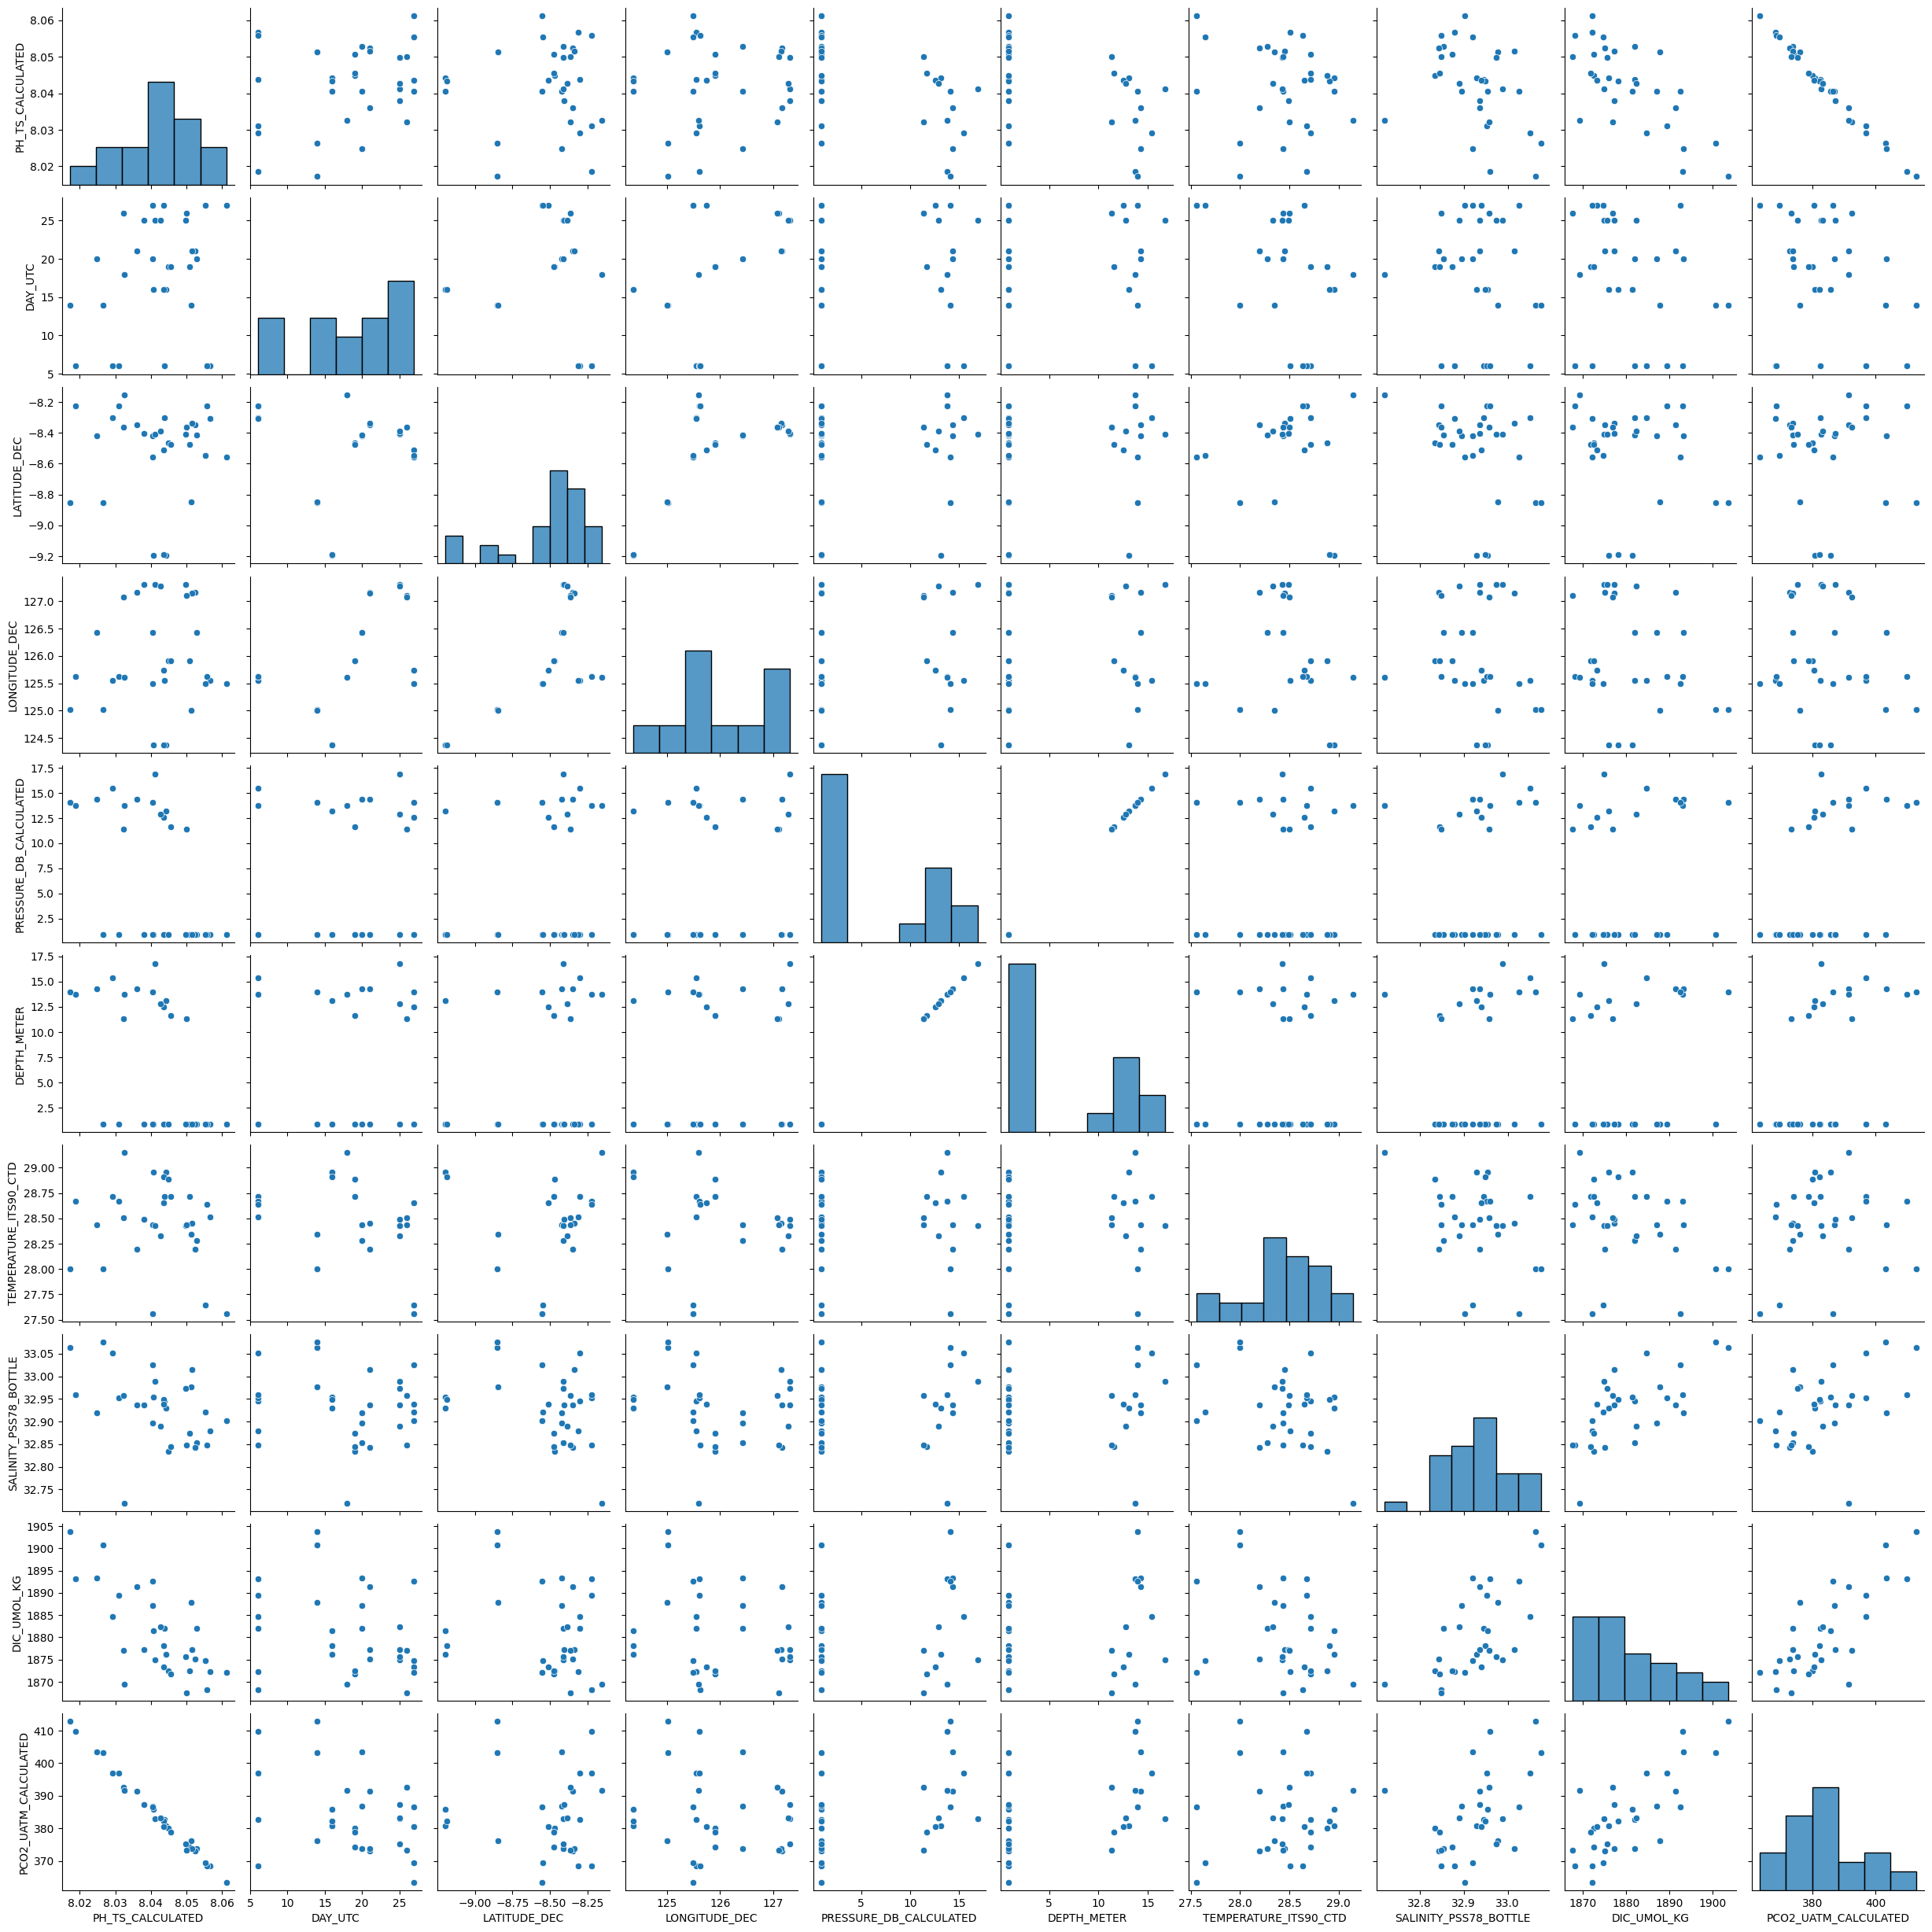

In [ ]:
# creating pairplot to examine correlations between features
# identifying any noticeable linear correlations
import seaborn as sns
from seaborn import pairplot
pairplot = sns.pairplot(df)

This seaborn pairplot shows the correlations between all features. In the sections below, we will investigate individual relationships between certain features to extract information about the dataset from these feature comparisons.

### Pearson Correlation Matrix

In [ ]:
# Pearson correlations with target y
xAll.reshape
featureDF = pd.DataFrame(feature_selection.r_regression(xAll,y), labels)
display(featureDF)

,0
Day,0.269908
Latitude,0.017123
Longitude,0.111417
Pressure,-0.544858
Depth,-0.544858
Temperature,-0.155031
Salinity,-0.414288
Dissolved_Inorganic_Carbon,-0.712308
pCO2,-0.994598


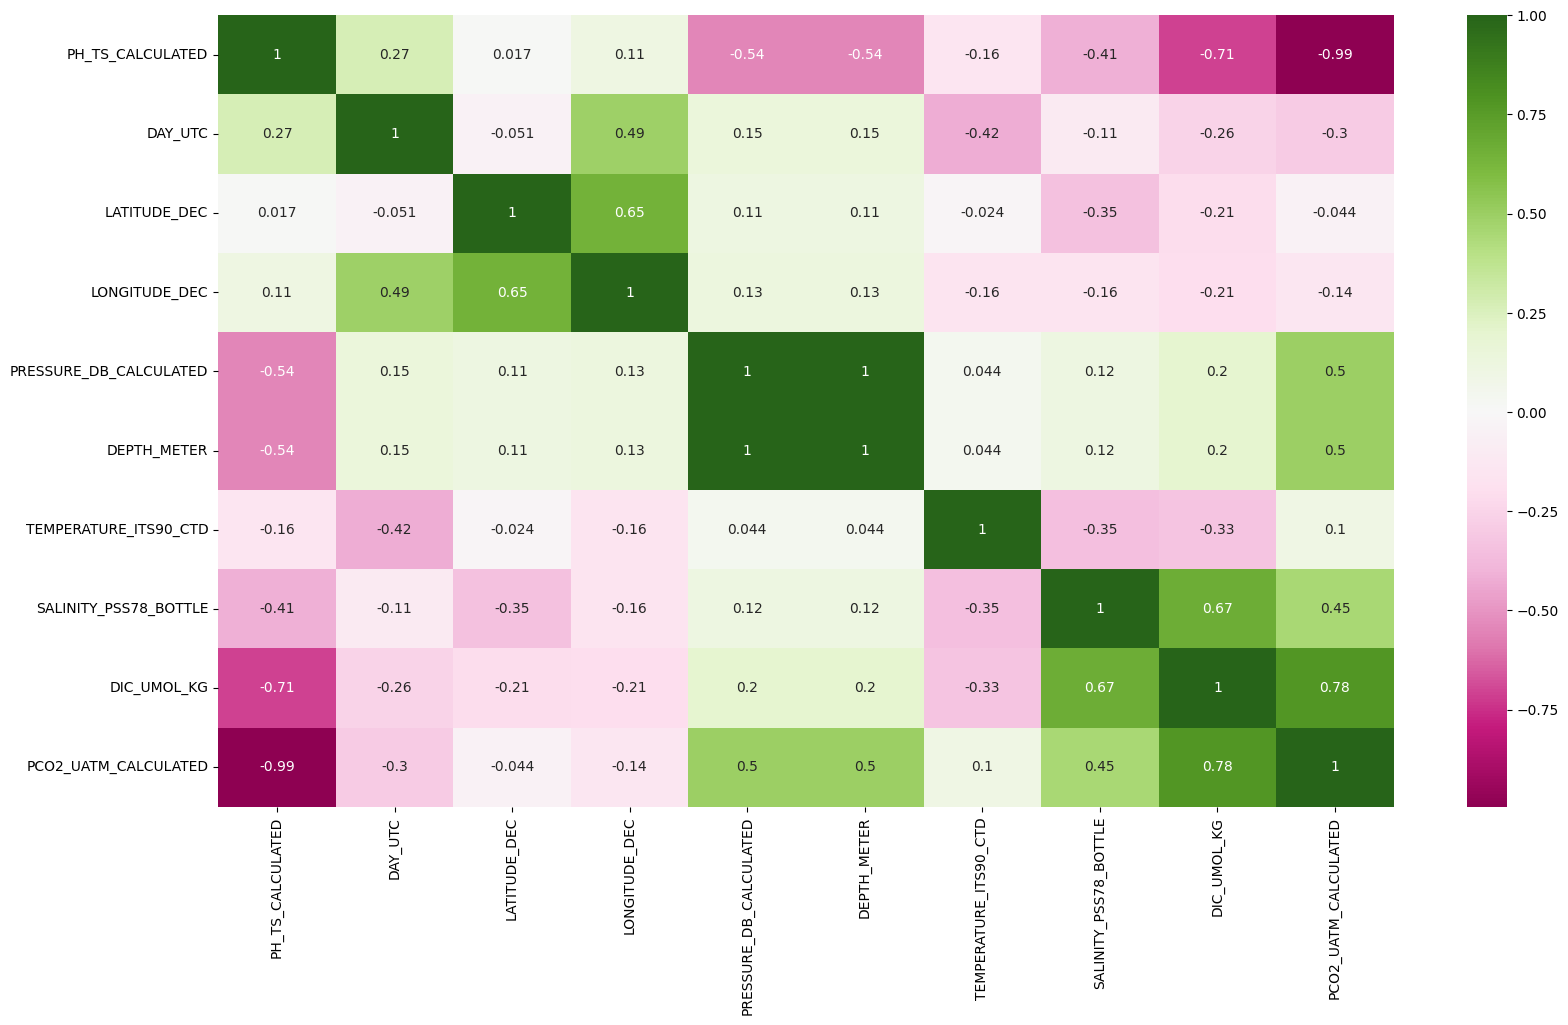

In [ ]:
# use R values (Pearson coefficients) to create heatmap to visualize correlations between features
plt.figure(figsize=(2*9.48,2*5.14))
pearsonPlot = sns.heatmap(df.corr(), cmap='PiYG', annot=True)
plt.savefig('PearsonPlot.png', dpi = 600)

### Test / Train Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
y = df[['PH_TS_CALCULATED']].to_numpy()
y.shape

# Note: There is no need to stratify when doing regression
Xtrain, Xtest, ytrain, ytest = train_test_split(xAll, y, test_size=0.2, random_state=42)

We decided to use an 80/20 test/train split since we will be using cross-validation for all of our models. This gives us roughly enough data to use for prediction purposes, but not too much so as to overfit the predictions/ test data.

In [ ]:
# import necessary tools
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Scaling Features

In [ ]:
scaler = StandardScaler()
scaler.fit(Xtrain)
xTrainStd = scaler.transform(Xtrain)
xTestStd = scaler.transform(Xtest)

### We will now compare different supervised regression models. We will use Decision Trees, Random Forests, and K Nearest Neighbors. 

### **K-Nearest Neighbors Regressor**

We chose to try out a K Nearest Neighbors (KNN) Regressor for this dataset. KNN is a lazy learning algorithm and does not have a training step. KNN Regression averages the output among the K nearest neighbors. This will allow us to determine whether the K nearest neighbors model is robust and effective for the large number of samples in the weather dataset compared to other eager learning methods we will visit, such as the Decision Tree Regressor and Random Forest Regressor.

In [ ]:
# KNN Regressor
knn = KNeighborsRegressor(n_neighbors = 20)

# fitting the KNN model
knn.fit(xTrainStd, ytrain)
yPredKNN = knn.predict(xTestStd)

# using K-fold Cross Validation (CV)
cv_scores = cross_val_score(knn, xTrainStd, ytrain, cv = 5)
print("CV scores for KNN:", cv_scores)
print("Mean of CV scores:", cv_scores.mean())
print("\nR2 score:", r2_score(ytest, yPredKNN))
print("Stdev:", cv_scores.std())
print("MSE:", mean_squared_error(ytest, yPredKNN))
print("RMSE:", mean_squared_error(ytest, yPredKNN, squared = False))
print("MAE:", mean_absolute_error(ytest, yPredKNN))

CV scores for KNN: [-9.60147577e-01 -1.54505389e-01 -1.35130659e-05 -2.78712052e+00
 -4.46961680e-02]
Mean of CV scores: -0.7892966343704912

R2 score: 0.1597689590935233
Stdev: 1.0583806464598196
MSE: 0.00015012563688503083
RMSE: 0.012252576744710919
MAE: 0.009946179674681588


We chose to optimize n_neighbors for the KNN Regressor, since a very low value for n_neighbors could lead to overfitting and a very high value could lead to underfitting. Thus, we must find the optimal value for n_neighbors that would yield the best accuracy score. We will do this using GridSearchCV and setting the parameters to a range of n_neighbors values.

In [ ]:
# KNN Regressor using GridSearchCV
params = {'n_neighbors': np.arange(1, 10)}
knnCV = GridSearchCV(knn, params, cv = 5)
knnCV.fit(xTrainStd, ytrain)
yPredictKNN = knnCV.predict(xTestStd)

In [ ]:
# Results for KNN using GridSearchCV
print("Optimal hyperparameters:",knnCV.best_params_)
print("KNN best CV score: ", knnCV.best_score_)
print("MAE using KNN: ", mean_absolute_error(ytest, yPredictKNN))
print("RMSE using KNN: ", mean_squared_error(ytest, yPredictKNN, squared=False))
print("R2 score for KNN:", r2_score(ytest, yPredictKNN))

Optimal hyperparameters: {'n_neighbors': 8}
KNN best CV score:  0.22326029996322355
MAE using KNN:  0.007167302321247198
RMSE using KNN:  0.008340924135768799
R2 score for KNN: 0.6106212907279496


### Graphing Predicted vs. Actual pH for KNN Model

Text(0, 0.5, 'Predicted values')

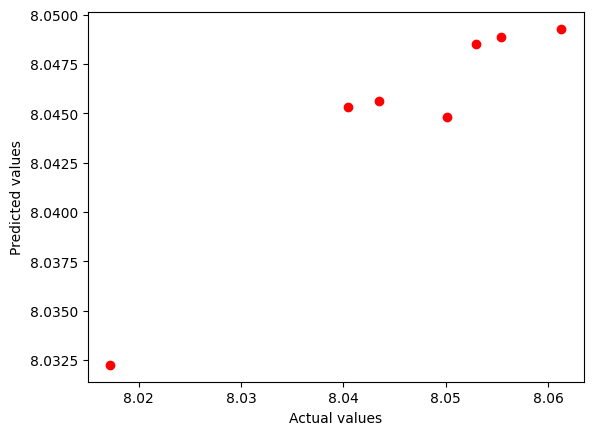

In [ ]:
plt.plot(ytest, yPredictKNN, 'ro')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

### **Decision Tree Regressor**

In [ ]:
tree = DecisionTreeRegressor(criterion="squared_error", max_depth=5, random_state=42)

# fitting the tree
tree.fit(xTrainStd, ytrain)
yPred = tree.predict(xTestStd)

# CV score, mean, standard deviation, MAE, RMSE on test set
print("Statistics for Decision Tree Regressor:\n")
print("Best CV score:", tree.score(xTestStd,ytest))

# using K fold cross validation
tree_scores = cross_val_score(tree, xTrainStd, ytrain, cv = 5)

# results of Decision Tree
print("\nMean:", np.mean(tree_scores))
print("R2 score:", r2_score(ytest, yPred))
print("Stdev:", np.std(tree_scores))
print("MSE:", mean_squared_error(ytest, yPred))
print("RMSE:", mean_squared_error(ytest, yPred, squared = False))
print("MAE:", mean_absolute_error(ytest, yPred))

Statistics for Decision Tree Regressor:

Best CV score: 0.9278720312150993

Mean: 0.8204368685357812
R2 score: 0.9278720312150993
Stdev: 0.15747145093617834
MSE: 1.2887237823747685e-05
RMSE: 0.0035898799177336957
MAE: 0.0027099852790252654


### GridSearch CV with Decision Tree
We chose to optimize two hyperparameters: the depth of the tree and the criterion (squared_error). Our main goal is to determine whether a larger depth makes more accurate predictions on the test set without overfitting. Additionally, since the criteria evaluate each split in the tree, we wanted to see which splits would perform better on average. We decided to test squared_error, as it is the most common loss function for supervised regression.

In [ ]:
# Using GridSearch CV
# Trained on a local machine with the following params:
params = {'max_depth': np.array([5, 10, 15, 25, 30, 45, 55, 65, 85, 90, 95, 100]), 'criterion': ['squared_error']}

# Then implemented the GridSearchCV:
tree = GridSearchCV(DecisionTreeRegressor(random_state = 1), params, n_jobs=-1, verbose=1, cv=5)
tree.fit(Xtrain, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': array([  5,  10,  15,  25,  30,  45,  55,  65,  85,  90,  95, 100])},
             verbose=1)

In [ ]:
# results for Decision Tree using GridSearchCV
yPred = tree.predict(Xtest)
results = pd.DataFrame(tree.cv_results_)
print("Best estimator:", tree.best_estimator_)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("\nBest CV score for decision tree: ", tree.score(Xtest,ytest))
print("MSE for decision tree: ", mean_squared_error(ytest, yPred))
print("RMSE for decision tree: ", mean_squared_error(ytest, yPred, squared = False))
print("MAE for decision tree: ", mean_absolute_error(ytest, yPred))
print("R2 score for Decision Tree:", r2_score(ytest, yPred))
print(tree.best_estimator_)

display(results)

Best estimator: DecisionTreeRegressor(max_depth=10, random_state=1)

Best CV score for decision tree:  0.8588720594059772
MSE for decision tree:  2.521559063218269e-05
RMSE for decision tree:  0.005021512783234022
MAE for decision tree:  0.0034010830032189837
R2 score for Decision Tree: 0.8588720594059772
DecisionTreeRegressor(max_depth=10, random_state=1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001182,0.000215,0.001620,0.001708,squared_error,5,"{'criterion': 'squared_error', 'max_depth': 5}",0.531304,0.801691,0.932283,0.942179,0.924639,0.826419,0.156179,12
1,0.003208,0.004583,0.000459,0.000072,squared_error,10,"{'criterion': 'squared_error', 'max_depth': 10}",0.542426,0.896315,0.944689,0.942179,0.928264,0.850775,0.155134,1
2,0.002685,0.003285,0.000543,0.000090,squared_error,15,"{'criterion': 'squared_error', 'max_depth': 15}",0.542426,0.896315,0.944689,0.942179,0.928264,0.850775,0.155134,1
3,0.002083,0.002318,0.001030,0.000995,squared_error,25,"{'criterion': 'squared_error', 'max_depth': 25}",0.542426,0.896315,0.944689,0.942179,0.928264,0.850775,0.155134,1
4,0.002121,0.002311,0.000466,0.000058,squared_error,30,"{'criterion': 'squared_error', 'max_depth': 30}",0.542426,0.896315,0.944689,0.942179,0.928264,0.850775,0.155134,1
5,0.000905,0.000057,0.001990,0.003057,squared_error,45,"{'criterion': 'squared_error', 'max_depth': 45}",0.542426,0.896315,0.944689,0.942179,0.928264,0.850775,0.155134,1
6,0.000890,0.000037,0.000484,0.000032,squared_error,55,"{'criterion': 'squared_error', 'max_depth': 55}",0.542426,0.896315,0.944689,0.942179,0.928264,0.850775,0.155134,1
7,0.000866,0.000046,0.000561,0.000157,squared_error,65,"{'criterion': 'squared_error', 'max_depth': 65}",0.542426,0.896315,0.944689,0.942179,0.928264,0.850775,0.155134,1
8,0.000885,0.000101,0.000483,0.000031,squared_error,85,"{'criterion': 'squared_error', 'max_depth': 85}",0.542426,0.896315,0.944689,0.942179,0.928264,0.850775,0.155134,1
9,0.000939,0.000086,0.000487,0.000013,squared_error,90,"{'criterion': 'squared_error', 'max_depth': 90}",0.542426,0.896315,0.944689,0.942179,0.928264,0.850775,0.155134,1


Text(0, 0.5, 'Predicted values')

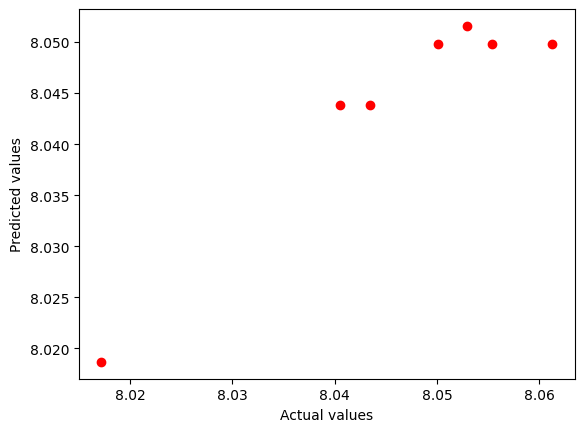

In [ ]:
plt.plot(ytest, yPred, 'ro')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

### **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest1 = RandomForestRegressor(n_estimators = 100, criterion = "squared_error", max_depth = 11)

# fitting the forest
forest1.fit(Xtrain, ytrain.ravel())
yPredForest = forest1.predict(Xtest)

# results of Random Forest
print("\nStatistics for Random Forest:\n")

#print("Mean score:", np.mean(forest_scores))
#print("Standard Deviation:", np.std(forest_scores))
print("MSE:", mean_squared_error(ytest, yPredForest))
print("RMSE:", mean_squared_error(ytest, yPredForest, squared = False))
print("MAE:", mean_absolute_error(ytest, yPredForest))


Statistics for Random Forest:

MSE: 2.15112586461151e-05
RMSE: 0.004638023139885689
MAE: 0.0032916479346114208


In [ ]:
# accuracy score for Random Forest
print("R2 score for Random Forest:", r2_score(ytest, yPredForest))

R2 score for Random Forest: 0.8796046590145327


### GridSearch CV with Random Forest
*   We chose to optimize n_estimators and critertion for the Random Forest Regressor.  
*   The number of estimators indicates how many trees we would like to use when training our Random Forest model. 
*   The criteria will allow us to determine which splitting methods work best for the the Random Forest, since splits will be evaluated based upon these criteria.

In [ ]:
# create Random Forest using GridSearchCV
params = {'n_estimators' : np.array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]), 'criterion' : ['squared_error']}
forest = GridSearchCV(RandomForestRegressor(random_state=42), params, n_jobs = -1, verbose = 1, cv = 5)

In [ ]:
forest.fit(Xtrain, ytrain.ravel())
# find the best estimator, find scores for forest
yPredForest = forest.predict(Xtest)

print("MSE:", mean_squared_error(ytest, yPredForest))
print("RMSE:", mean_squared_error(ytest, yPredForest, squared = False))
print("MAE:", mean_absolute_error(ytest, yPredForest))
print("Best estimator:", forest.best_estimator_)
print("R2 score for Random Forest:", r2_score(ytest, yPredForest))
featureImportancepd = pd.DataFrame(forest.best_estimator_.feature_importances_, labels)
display(featureImportancepd)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
MSE: 2.053575672007197e-05
RMSE: 0.0045316395178866525
MAE: 0.003241036572706183
Best estimator: RandomForestRegressor(n_estimators=300, random_state=42)
R2 score for Random Forest: 0.8850643993742235


,0
Day,0.008401
Latitude,0.010416
Longitude,0.006791
Pressure,0.014835
Depth,0.002799
Temperature,0.010794
Salinity,0.008302
Dissolved_Inorganic_Carbon,0.026037
pCO2,0.911625


In [ ]:
# CV scores for Random Forest using GridSearchCV
scores = cross_val_score(forest, xAll, y, cv=5, n_jobs=-1)
print("CV Scores for Random Forest:\n")
print(scores)

CV Scores for Random Forest:

[0.91422758 0.93751941 0.91687457 0.89305765 0.82873462]


Text(0, 0.5, 'Predicted values')

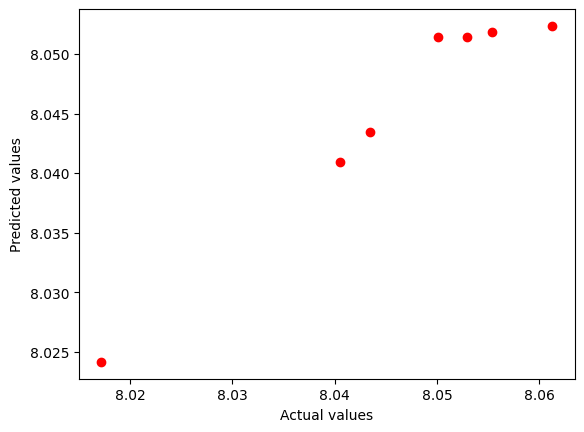

In [ ]:
plt.plot(ytest, yPredForest, 'ro')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
# evaluate model
cv = KFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
print("Best CV score for random forest:", forest.best_score_)

Best CV score for random forest: 0.833132567677288


The Decision Tree Regressor performs best in this scenario, but the Random Forest Regressor produces more promising results with larger datasets because it creates multiple sample variations on the same dataset in order to achieve higher train/ test accuracy. Although a Decision Tree is a strong model to use, it does not _always_ perform as well as a Random Forest (RF), as RFs are composed of a collection of randomized Decision Trees. Random Forests use a method called feature bagging which decreases redundant correlation between trees, increasing overall model accuracy. Feature bagging randomly selects a subset of features at each split in each individual Decision Tree to avoid strong predictive features that lead to similar splits between trees. This is a strong reason for why the Random Forest Regressor should be preferred over the Decision Tree Regressor. Thus, our team will seek to gather larger amounts of data such that we can perform more thorough testing with the KNN, Decision Tree, and Random Forest models similar to how we performed the training above. 

**Note: By comparing the CV scores, it seems that RF is actually a better predictor than both KNN and DT, as RF had scores ranging to 94%**

### Principal Component Analysis (PCA)
Perform dimensionality reduction using PCA. Can a more accurate or efficient model be created using these features?

In [ ]:
from sklearn.decomposition import PCA

# apply PCA and transform the standardized dataset
pca = PCA()
XtrainPCA = pca.fit_transform(xTrainStd)
XtestPCA = pca.fit_transform(xTestStd)

# print explained variance of each PC
variance = pca.explained_variance_ratio_
print("Variance of each PC:", variance)
XtrainPCA.shape

Variance of each PC: [5.27987470e-01 2.13476206e-01 1.74889775e-01 7.92205219e-02
 4.41472491e-03 1.13022997e-05 1.12344186e-34]


(25, 9)

In [ ]:
# checking that the sum of each variance is 1
print("Sum of variance:", np.sum(variance))

varianceDF = pd.DataFrame(variance)
display(varianceDF)

Sum of variance: 1.0


,0
0,5.279875e-01
1,2.134762e-01
2,1.748898e-01
3,7.922052e-02
4,4.414725e-03
5,1.130230e-05
6,1.123442e-34


In [ ]:
pca = PCA(n_components=9)
x_train_PCA = pca.fit_transform(xTrainStd)
x_test_PCA = pca.transform(xTestStd)

scaler = StandardScaler()
scaler.fit(ytrain)
ytrainStd = scaler.transform(ytrain)
ytestStd = scaler.transform(ytest)

treePCA = DecisionTreeRegressor(criterion="squared_error", max_depth=5, random_state=42)

# fitting the tree
treePCA.fit(x_train_PCA, ytrainStd)
yPredPCA = treePCA.predict(x_test_PCA)

print("Accuracy score for Decision Tree w/ PCA:", r2_score(ytestStd, yPredPCA))

Accuracy score for Decision Tree w/ PCA: 0.7735599244331799


As shown in the code above, there is still a relatively high accuracy score (measured with R2) for the Decision Tree regressor with 9 features. Since our original random forest and decision tree models already perform better than they do with PCA, we will not use PCA for any further calculations. This concludes our additional investigation.

### Train each of the 3 models using the top 5 features. How does this affect the performance of the models?

In [ ]:
dfSelected = df[['PRESSURE_DB_CALCULATED', 'DEPTH_METER', 'SALINITY_PSS78_BOTTLE', 'DIC_UMOL_KG', 'PCO2_UATM_CALCULATED']]

xSelect = dfSelected.to_numpy()

xTrainSelect, xTestSelect, yTrainSelect, yTestSelect = train_test_split(xSelect, y, test_size=0.2, random_state=42)

scaler.fit(xSelect)
xTrainSelect = scaler.transform(xTrainSelect)
xTestSelect = scaler.transform(xTestSelect)

### KNN model trained on these selected features

In [ ]:
# Code used to train model:
params = {'n_neighbors': np.arange(1, 50)}

knnSelect= GridSearchCV(KNeighborsRegressor(), params, cv = 5)
knnSelect.fit(xTrainSelect, yTrainSelect)

In [ ]:
yPredictKNN = knnSelect.predict(xTestSelect)

print("Optimal hyperparameters:",knnSelect.best_params_)
print("KNN best CV score: ", knnSelect.best_score_)
print("MAE using KNN: ", mean_absolute_error(yTestSelect, yPredictKNN))
print("RMSE using KNN: ", mean_squared_error(yTestSelect, yPredictKNN, squared=False))
print("Accuracy score for KNN:", r2_score(yTestSelect, yPredictKNN))

Optimal hyperparameters: {'n_neighbors': 1}
KNN best CV score:  0.2605526342738462
MAE using KNN:  0.0023059349474200885
RMSE using KNN:  0.0028553432715776967
Accuracy score for KNN: 0.9543689446918789


### Decision Tree Model trained on the selected features

In [ ]:
# Code used to train model
params = {'max_depth': np.array([5, 10, 15, 25, 30, 45, 55, 65, 85, 90, 95, 100]), 'criterion': ['squared_error']}

treeSelect = GridSearchCV(DecisionTreeRegressor(random_state=1), params, n_jobs = -1, verbose = True, cv = 5)
treeSelect.fit(xTrainSelect, yTrainSelect)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': array([  5,  10,  15,  25,  30,  45,  55,  65,  85,  90,  95, 100])},
             verbose=True)

In [ ]:
yPredictTree = treeSelect.predict(xTestSelect)

print("Optimal hyperparameters:",treeSelect.best_params_)
print("Best CV score: ", treeSelect.best_score_)
print("MAE: ", mean_absolute_error(yTestSelect, yPredictTree))
print("RMSE: ", mean_squared_error(yTestSelect, yPredictTree, squared=False))
print("Accuracy score:", r2_score(yTestSelect, yPredictTree))

Optimal hyperparameters: {'criterion': 'squared_error', 'max_depth': 5}
Best CV score:  0.8536216703878992
MAE:  0.004342315968136136
RMSE:  0.0051045939036432715
Accuracy score: 0.8541634929720451


### Random Forest Model trained on the selected features

This first random forest doesn't use a set depth for each estimator. Instead, it keeps adding layers until all the layers are pure.

In [ ]:
# Code used to train model:
params = {'n_estimators': np.array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300])}
forestSelect = GridSearchCV(RandomForestRegressor(criterion = 'squared_error'), params, cv = 5, n_jobs = -1, verbose = True)
forestSelect.fit(xTrainSelect, yTrainSelect)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300])},
             verbose=True)

### Results

In [ ]:
yPredictForest = forestSelect.predict(xTestSelect)

print("Optimal hyperparameters:",forestSelect.best_params_)
print("Best CV score: ", forestSelect.best_score_)
print("MAE: ", mean_absolute_error(yTestSelect, yPredictForest))
print("RMSE: ", mean_squared_error(yTestSelect, yPredictForest, squared=False))
print("Accuracy score:", r2_score(yTestSelect, yPredictForest))

Optimal hyperparameters: {'n_estimators': 280}
Best CV score:  0.8556896934521226
MAE:  0.0028176659193017073
RMSE:  0.003669827288964196
Accuracy score: 0.924623648787303


As you can see, the accuracy score with the optimal parameters is 92% with random forest.

In [ ]:
d = {'Model Trained' : ['KNN', 'Decision Tree', 'Random Forest'], 'Original Score' : [0.6106212907279496, 0.9278720312150993, 0.8850643993742235], 'Score w/ Selected Features' : [0.9543689446918789, 0.8541634929720451, 0.924623648787303]}
df = pd.DataFrame(data=d)
df

,Model Trained,Original Score,Score w/ Selected Features
0,KNN,0.610621,0.954369
1,Decision Tree,0.927872,0.854163
2,Random Forest,0.885064,0.924624


As seen in the table above, the performance of the models tended to improve when trained on selected features. This suggests that our method of selecting certain features in order to reduce complexity and remove noise was successful. This may be good to consider when training our models on data that predicts the other variables we'd like to use for our coral reef index calculations.

## Calculating Coral Reef Index using Coral Growth, Aragonite Production Level, and Water Temperature

Corals in more acidic waters (lower pH) are factually thinner [[1]](https://beta.nsf.gov/news/scientists-pinpoint-how-ocean-acidification), indicating poor coral recruitment (or slow coral growth). Thus, our calculations would use the coral growth predicted from the model above with higher values implying stronger growth and lower values indicating weaker growth.  

If acidic waters are affecting corals' ability to grow strong, thick skeletons, then their defining index, or the score that measures the relative health of the coral reef, must be low. Additionally, as a result of low coral growth levels, corals will not have high enough aragonite levels. Aragonite levels strictly correlate with coral reef health.

The following calculations using the calculated coral growth from a variety of variables that our sensor will be able to collect is vital for this coral reef index calculation. After consulting many scholarly sources on the importance of different features of coral reefs, we determined that the following equation is appropriate for curating a coral reef index. The equation includes the most important variables for consideration, namely, coral growth, temperature of the water, and the coral reef's aragonite production levels.

Healthy aragonite level: 3.5 < Ω < 4.0 [[2]](https://serc.carleton.edu/eslabs/corals/4c.html)

Key Notes: As temperature increases, coral reef growth declines. Temperature (T) is measured in Celsius. Coral growth (G) is measured in units per meters squared. In the equation below, n = 5, since we are calculating a score out of 5. CRI stands for "coral reef index."

$CRI = \frac{1}{\sqrt{a^2*\frac{G}{T}} - 0.5} * (n - 0.1)$




In [ ]:
d_eq = pd.read_csv('/content/drive/My Drive/Colab Notebooks/coralreef.csv')

In [ ]:
import math
# Sample coral reef index calculations for 30 reef locations in the range (0, 5]
n = 5
pH_values = d_eq['PH_TS_CALCULATED'].to_numpy()
temp_values = d_eq['TEMPERATURE_ITS90_CTD'].to_numpy()
aragonite_values = d_eq['ARAGONITE_SAT'].to_numpy()
for i in np.arange(30):
  p = pH_values[i]
  T = temp_values[i]
  a = aragonite_values[i]
  fractional_idx = (a**2)*(p/T)
  cri = (1/(math.sqrt(fractional_idx)-0.5))*(n - 0.1)
  print(f"Reef index {i + 1}: {cri}")

Reef index 1: 3.563293552603447
Reef index 2: 3.708406785566845
Reef index 3: 3.4833252687089615
Reef index 4: 3.682197070347739
Reef index 5: 3.8116472610140333
Reef index 6: 3.4920164368903026
Reef index 7: 3.5555805546901076
Reef index 8: 3.5734497012082738
Reef index 9: 3.5575247602567033
Reef index 10: 3.8633214798167157
Reef index 11: 3.762061036191079
Reef index 12: 3.505902921276765
Reef index 13: 3.5682950069560184
Reef index 14: 3.582764018666108
Reef index 15: 3.5225062899482635
Reef index 16: 3.616772252184118
Reef index 17: 3.771264409380799
Reef index 18: 3.5200670308863375
Reef index 19: 3.5516056957727526
Reef index 20: 3.6777147574391162
Reef index 21: 3.5177949395570165
Reef index 22: 3.6401781968717724
Reef index 23: 3.5448709890037384
Reef index 24: 3.6602495222518123
Reef index 25: 3.574348856259555
Reef index 26: 3.7236605764073207
Reef index 27: 3.6922336671254445
Reef index 28: 3.59927449139471
Reef index 29: 3.6840744065082016
Reef index 30: 3.525692958152532


## Future Modifications

The equation above only takes into account what our research found to be the most critical factors in influencing coral reef health. However, there are so many other confounding factors that play a role in stabilizing or de-stabilizing a coral reef ecosystem. These variables, such as coral coverage, disease relevance, and biodiversity, should theoretically sway the coral reef score each by their own appropriate proportion. 

More research has yet to determine the exact contribution of each of these additional variables to the final coral reef index. As of yet, our team plans to continue studying coral reef health as well as the impacts of several factors to the growth of the reefs.

We will use our original equation as a foundation to scoring current coral reef ecosystems, but we will continue to tweak it as we measure the affects of more variables on coral reefs via our BlueReef sensor. Nonetheless, our extensive research has proven that coral growth, water temperature, and aragonite levels are critical components for the proper coral reef index calculation and thus provide a very appropriate calculation that will be incredibly useful for non-profits/ NGOs interested in drawing attention to and directly improving coral reef ecosystems.